In [64]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder = os.path.join(os.getcwd(),"data")

extension = '.jpg'

names = [name for name in os.listdir(folder) if name.endswith(extension)]
steps = [int(step.replace(extension,'')) for step in names]
filenames = [os.path.join(folder,name) for name in names]
images = [cv2.imread(filename, cv2.IMREAD_UNCHANGED) for filename in filenames]

data = []
meta = []

for k,image in enumerate(images):
    
    name = names[k]
    step = steps[k]

    i8 = image.copy() # Mono8

    rc,it = cv2.threshold(255-i8,100,200,1)
    it = cv2.dilate(it, kernel=np.ones((80,80),np.uint8), iterations=1)
    cc,h = cv2.findContours(it,1,2)

    aa = []
    ca = []
    for c in cc:
        a = cv2.approxPolyDP(c, 0.1*cv2.arcLength(c,True), True)
        if len(a) == 4:

            r = cv2.minAreaRect(c)
            b = cv2.boxPoints(r)
            b = np.intp(b)
            
            aa.append(b)
            ca.append(cv2.contourArea(c))
    
    ca = np.array(ca)    
    if len(a)>0:

        ic = cv2.cvtColor(i8,cv2.COLOR_GRAY2RGB)
        
        index = np.argmax(ca)        

        lva = cv2.Laplacian(i8, cv2.CV_64F).var()
        
        meta.append(dict(
            step=step,
            name=name,
            area=ca[index],
            blur=lva
            ))

        a = aa[index]        
        cv2.drawContours(
            image=ic,
            contours=[a],
            contourIdx=0,
            color=(255,0,0),
            thickness=25)
    
    data.append(dict(
        ic=ic,
        i8=i8,
        it=it
        ))

data = np.array(data)
N = data.shape[0]

meta = pd.DataFrame(meta)
meta.sort_values(by=['step'],inplace=True)
index = meta.index.to_list()

data = data[index]

meta

,step,name,area,blur
0,3540,3540.jpg,8630984.5,0.783215
1,4030,4030.jpg,7204663.0,0.486059
2,4250,4250.jpg,6712364.5,0.418416
3,4280,4280.jpg,6634829.5,0.432736
4,4310,4310.jpg,6553908.5,0.499488
5,4340,4340.jpg,6472692.5,0.773657
6,4410,4410.jpg,6377118.5,2.520025
7,4440,4440.jpg,6299427.5,11.836426
8,4470,4470.jpg,6225690.5,40.791822
9,4500,4500.jpg,6154672.0,178.273954


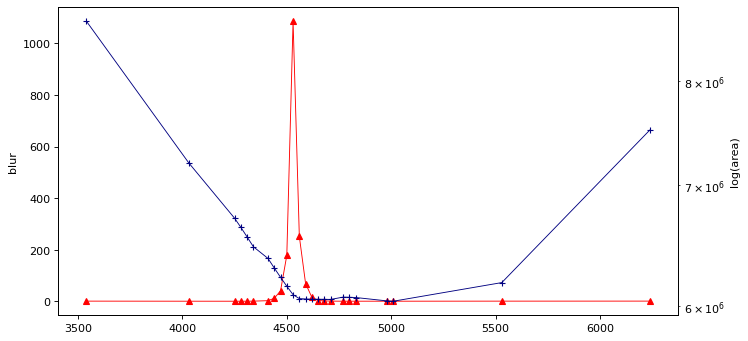

In [65]:
ncols = 1
nrows = 1

w = 10
h = w/2

dpi = 80
plt.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.figsize'] = [w,h]

fig, ax = plt.subplots(nrows=nrows,ncols=ncols)

ax.plot(meta['step'],meta['blur'],'^-',lw=0.8,c='red',label='blur(step)')
ax.set_ylabel('blur')

ax2 = ax.twinx()
ax2.plot(meta['step'],meta['area'],'+-',lw=0.8,c='navy',label='area(step)')
ax2.set_yscale('log')
ax2.set_ylabel('log(area)')

plt.show()
plt.close()

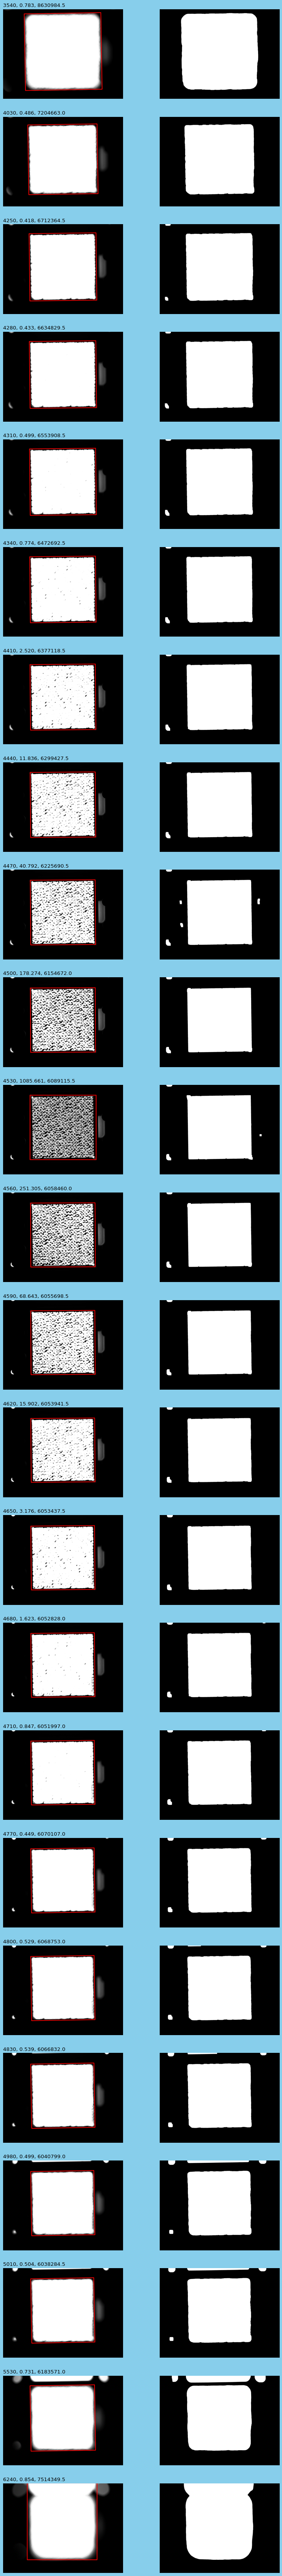

In [66]:

ncols = 2
nrows = N

shape = images[0].shape
f = shape[1]/shape[0]

w = 12
h = w*nrows / 2 / f

dpi = 80
plt.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.figsize'] = [w,h]

fig, ax = plt.subplots(nrows=nrows,ncols=ncols)

fig.set_facecolor('skyblue')

for j in range(N):
    
    ax[j,0].imshow(data[j]['ic'])
    ax[j,1].imshow(data[j]['it'], cmap=plt.cm.gray)

    ax[j,0].set_title(f"{meta.loc[index[j],'step']}, {meta.loc[index[j],'blur']:.3f}, {meta.loc[index[j],'area']}", 
                      x=0, ha="left")   
    
for a_ in ax.ravel():
    a_.set_axis_off()

#plt.tight_layout()
plt.show()
plt.close()
